In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
# import datasets 
import numpy as np
import os
import pathlib
import PIL.Image #abbreviation of python Image Library, a.k.a Pillow) import Image to load, manage, save image files in diverse formats
import IPython.display as display #to display images later on


In [2]:
# Change dataset directory to match yours
train_dir = pathlib.Path('/home/iris/catkin_ws/src/tensorflow_ex/datasets/train')
test_dir = pathlib.Path('/home/iris/catkin_ws/src/tensorflow_ex/datasets/test')


In [3]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count) #25000 images for training
image_count = len(list(test_dir.glob('*/*.jpg')))
print(image_count) #12500 images for testing

25000
12500


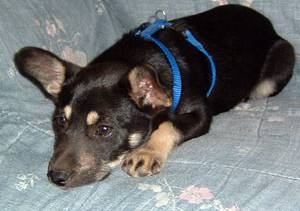

In [4]:
#separate train and test data
train = list(train_dir.glob('dogs/*'))
PIL.Image.open(str(train[0]))
test = list(test_dir.glob('test1/*'))
PIL.Image.open(str(test[0]))

In [5]:
#create the dataset:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
#we create a training subset of 80% of images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 12500 files for training.


In [7]:
#we create a validation subset of 20% of images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 12500 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

[&#39;cats&#39;, &#39;dogs&#39;]


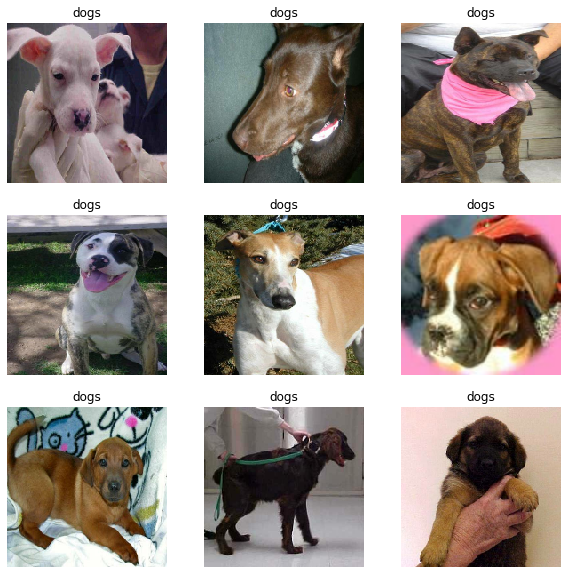

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer

In [10]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) #This function is left here for explanatory purposes. Rescaling is made in the first layer of the model (see hereafter)

### Configuration of dataset for performance

```.cache()``` keeps the images in memory after they're loaded off disk during the first epoch.

```.prefetch()``` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### SIMPLE MODEL CREATION

In [9]:
num_classes = 2
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Conv2D(32, 3, activation='relu'),
  #tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [10]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [1]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1
)

NameError: name &#39;model&#39; is not defined